In [14]:
import pandas as pd
import json
import random

* Search results without a document ID
* Document ID without a file name
* Missing filenames from cube



## Reports
* Assessment profile of ids
* collected documents by case code

In [15]:
def create_pdf():
    val = 'S-'
    for i in range(0,7):
        val += str(random.randint(0,9))
        
    return val + '.pdf'
create_pdf()

'S-6943499.pdf'

In [16]:
def create_id():
    val = ''
    for i in range(0,7):
        val += str(random.randint(0,9))
        
    return val 
create_id()

'4146397'

In [17]:
def get_id():
    val= "S-"
    for i in range(0,8):
        val += str(random.randint(0,9))
        
    return val
get_id()

'S-88648769'

In [18]:
random.random()

0.30499701060345774

In [19]:
documents = []

for i in range(0,12000):
    if random.random() >.1:
        document = {"document_id" : create_id(),
                     "filename": create_pdf()
                     }
    else:
        document = {"document_id" : create_id(),
                     "filename": None
                     }
    documents.append(document)

    
len(documents)

12000

In [20]:
"test.pdf".replace(".pdf", "")

'test'

In [21]:
bi_cube = [{'filename':record['filename'].replace('.pdf', "")} for record in random.sample(documents, 10000) if record['filename'] is not None]

len(bi_cube)

9017

In [22]:
for i in range(0,2000):
  bi_cube.append({'filename':create_pdf().replace('.pdf', "")})


len(bi_cube)

11017

In [23]:
df_documents = pd.json_normalize(documents)
df_bi_cube = pd.DataFrame(bi_cube)

## No Filename

In [24]:
no_id = df_documents.query("filename.isna()")
no_id.count()

document_id    1162
filename          0
dtype: int64

In [25]:
df_documents['bi_key'] = df_documents['filename'].str.replace(".pdf", "")
df_documents

<ipython-input-25-486920bfed04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_documents['bi_key'] = df_documents['filename'].str.replace(".pdf", "")


,document_id,filename,bi_key
0,0866586,S-6528722.pdf,S-6528722
1,9088556,S-6519734.pdf,S-6519734
2,5279982,S-5147334.pdf,S-5147334
3,0980537,S-8491118.pdf,S-8491118
4,0920733,S-8055391.pdf,S-8055391
...,...,...,...
11995,7956603,S-1564406.pdf,S-1564406
11996,4205051,S-7187401.pdf,S-7187401
11997,5083442,S-0130822.pdf,S-0130822
11998,1331597,S-3111757.pdf,S-3111757


In [26]:
no_id = df_documents.query("bi_key.isna()")
no_id

,document_id,filename,bi_key
8,6064585,None,None
15,1068326,None,None
21,4876752,None,None
25,3932819,None,None
30,3920938,None,None
...,...,...,...
11940,9338287,None,None
11942,8742035,None,None
11950,5806787,None,None
11960,5042190,None,None


In [27]:
df_bi_cube['bi_key'] = df_bi_cube['filename']
df_bi_cube

,filename,bi_key
0,S-6971604,S-6971604
1,S-3131884,S-3131884
2,S-7211175,S-7211175
3,S-2489640,S-2489640
4,S-8347155,S-8347155
...,...,...
11012,S-2799449,S-2799449
11013,S-6567099,S-6567099
11014,S-0569952,S-0569952
11015,S-4688876,S-4688876


In [28]:
df_outer = (df_documents.set_index('bi_key')
.join(df_bi_cube.set_index("bi_key"), 
      lsuffix = "_docs", 
      rsuffix = "_cube",
     how = "outer")
.reset_index())
df_outer
# df_outer['bi_key'].notnull().value_counts()

,bi_key,document_id,filename_docs,filename_cube
0,S-0000983,5913672,S-0000983.pdf,S-0000983
1,S-0001676,NaN,NaN,S-0001676
2,S-0001873,NaN,NaN,S-0001873
3,S-0002272,8472504,S-0002272.pdf,NaN
4,S-0003180,9503068,S-0003180.pdf,S-0003180
...,...,...,...,...
13999,None,9338287,None,NaN
14000,None,8742035,None,NaN
14001,None,5806787,None,NaN
14002,None,5042190,None,NaN


In [29]:
print(len(df_outer))
print(len(df_bi_cube))
print(len(df_documents))

14004
11017
12000


In [30]:
test = {(True, False):1}
test.get((True, True))

In [31]:
lookup_dict = {True : 
               {True: 1,
                False :2},
               False:
               {True: 3,
               False: 4}}
 
pd.DataFrame.from_records(lookup_dict)

,False,True
True,3,1
False,4,2


In [32]:
lookup = {(True, True): "In Both", 
          (True, False): "In collected docs but not from bi_cube" ,
          (False, True): "In BI Cube but not collected",
          (False, False): "No filename for collected doc; no match to bi_cube"              
          
}
lookup.get((True,True))

'In Both'

In [33]:
df_lookup = pd.DataFrame.from_dict(lookup, orient = "index", columns = ["var"])
df_lookup.index = pd.MultiIndex.from_tuples(df_lookup.index)
df_lookup.index.names = ["filename_docs", "filename_cube"]
df_lookup

var
filename_docs filename_cube                                                   
True          True                                                     In Both
              False                     In collected docs but not from bi_cube
False         True                                In BI Cube but not collected
              False          No filename for collected doc; no match to bi_...

In [34]:
df = pd.DataFrame(lookup, index = [1])
df = df.melt(var_name = ["filename_docs", "filename_cube"]).set_index(["filename_docs", "filename_cube"])

In [35]:
lookup.get(True, False)

False

Text(0, 0.5, '')

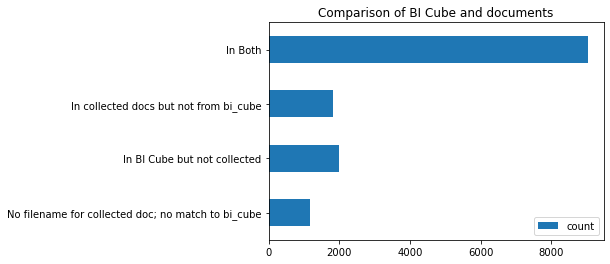

In [36]:
(df_outer
.notnull()
.groupby(['filename_docs', 'filename_cube'])
.size()
.to_frame(name='count')
# .reset_index()
# # .assign(x = lambda df: [(row['filename_docs'], row['filename_cube']) for index, row in df.iterrows()])
# # .assign(y = lambda df: df['x'].apply(lambda x: lookup.get(x))) 
# .set_index(["filename_docs", "filename_cube"])
 .join(df_lookup)
 .set_index("var")
 .plot.
 barh(title = "Comparison of BI Cube and documents")
 .set_ylabel("")
)

## Assessment Breakdown

In [37]:
category = ["Full", "Assessment", None]
weights = [.5,.4,.1]

random.choices(category, weights )

records = []

for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : random.choices(category, weights)[0]}

        records.append(record)
        
len(records)   

2383

In [38]:
for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : 'Full'}

        records.append(record)

In [39]:
for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : 'Assessment'}

        records.append(record)

In [40]:
len(records)

7155

In [41]:
df_records = (pd.DataFrame(records)
.fillna("missing category")
             )
df_records['category'].value_counts()

Full                3682
Assessment          3257
missing category     216
Name: category, dtype: int64

In [42]:
(1183.7 - 100 - 150)/2

466.85

[Text(0, 0.5, 'Percent of Reports in Assessment'),
 Text(0.5, 0, 'Count of IDs'),
 Text(0.5, 1.0, 'ID Profile')]

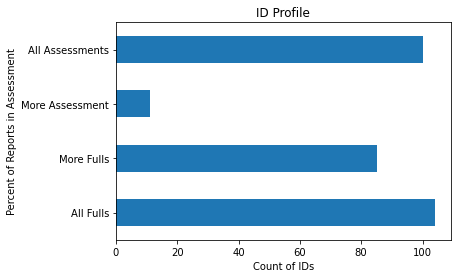

In [43]:
(df_records
 .groupby(['id', 'category'])
 .size()
 .to_frame(name = "value")
 .groupby('id')
 .transform(lambda x: x/sum(x))
 .pivot_table(index = 'id',
             columns = 'category',
             values = 'value')
 .fillna(0)
 [['Assessment']]
 .assign(cuts = lambda x: pd.cut(x['Assessment'], [-1 ,0  ,.5,.9999, 1],
                                         labels = ["All Fulls", "More Fulls", "More Assessment", "All Assessments"]))
 ['cuts']
 .value_counts()
 .sort_index()
 .plot
 .barh(title = "")
 .set(ylabel = "Percent of Reports in Assessment",
      xlabel = "Count of IDs",
      title = "ID Profile")
 

 
 
)

[Text(0, 0.5, ''), Text(0.5, 0, 'Count of IDs'), Text(0.5, 1.0, 'ID Profile')]

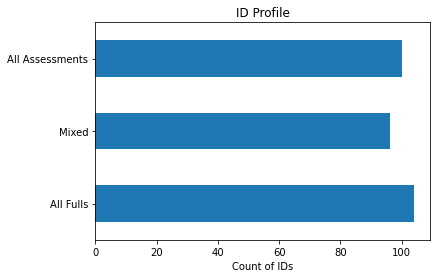

In [44]:
(df_records
 .groupby(['id', 'category'])
 .size()
 .to_frame(name = "value")
 .groupby('id')
 .transform(lambda x: x/sum(x))
 .pivot_table(index = 'id',
             columns = 'category',
             values = 'value')
 .fillna(0)
 [['Assessment']]
 .assign(cuts = lambda x: pd.cut(x['Assessment'], [-1 ,0, .9999, 1],
                                         labels = ["All Fulls", "Mixed", "All Assessments"]))
 ['cuts']
 .value_counts()
 .sort_index()
 .plot
 .barh(title = "")
 .set(ylabel = "",
      xlabel = "Count of IDs",
      title = "ID Profile")
 )

In [73]:
df_bokeh = (df_records
 .groupby(['id', 'category'])
 .size()
 .to_frame(name = "value")
 .groupby('id')
 .transform(lambda x: x/sum(x))
 .pivot_table(index = 'id',
             columns = 'category',
             values = 'value')
 .fillna(0)
 [['Assessment']]
 .assign(cuts = lambda x: pd.cut(x['Assessment'], [-1 ,0, .9999, 1],
                                         labels = ["All Fulls", "Mixed", "All Assessments"]))
 ['cuts']
 .value_counts()
 .sort_index()
 .reset_index(name = "value")
 .rename({"index": "type"}, axis = 1)
 
)

df_bokeh

,type,value
0,All Fulls,104
1,Mixed,96
2,All Assessments,100


In [53]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource


In [48]:
output_notebook()

Loading BokehJS ...

In [80]:
df_bokeh['type'].astype(str).values

array(['All Fulls', 'Mixed', 'All Assessments'], dtype=object)

In [102]:
source = ColumnDataSource(df_bokeh)


tooltips = [
    ("Type", "@type"),
    ("Value", "(@value)")
]

# Set the x_range to the list of categories above
p = figure(title="title", y_range = df_bokeh['type'].astype(str),
          tooltips = tooltips)

# Categorical values can also be used as coordinates
p.hbar(y = "type", right ="value", source = source, height = .3)

show(p)

In [94]:
per = .09/365

5000 * per * 60


73.97260273972603